# Exploring Housing in the city of London! 🇬🇧

The population of London makes it the biggest city in the United Kingdom. Birmingham, the second-largest city in the UK, has 1.1 million residents, or 11,98% of the population of the Capital City. With a size that is twice that of Dublin and three times that of Rome, London is also the largest city in the European Union.

With a variety of business-oriented land uses, including offices, retail, residences, and hotels, the City of London is the hub of the top financial, business, and maritime center in the world. In a number of papers, the land use is examined with an emphasis on the spatial distribution and quantification of the number of units and floorspace. The City of London has a limited overall housing stock when compared to other boroughs of London.



# Goal

The goals of this study were to examine the historical prices, sales, crimes, residential satisfaction, and salaries in the London housing market, evaluate a dataset that is largely focused on the London housing market, and cluster the market's geographic data using K-means.

# Business Task

Analyze the best housing offers in the city by:-

    > Examining the borough-specific historical home prices, sales, crimes, residential satisfaction, and salaries.
    > Analyzing the dataset, which largely focuses on the London housing market.
    > How many houses were sold in London over time?
    > How the average house price behave in the same period? How did it behave in the other regions?
    > How many houses were sold in Inner and Outer London areas? What about the average price in both regions?

## Dataset Details

The datasets is primarily centered around the housing market of London. However, it contains a lot of additional relevant data. The data is split into two files based on the variable collection frequency (monthly and yearly).

This dataset comprises of various house listings in London and neighbouring region.

# Process

I have chosen to conduct my analysis in Python due to its ease of use, power, and exceptional data analysis/visualization capabilities.

Importing the Necessary Python Libraries

We will be using the following Python libraries for our analysis;
numpy
pandas
matplotlib
seaborn
plotly
geopandas
folium

After bringing in the libraries required for our analysis. The process of preparing the data takes up a significant portion of our work.
Effective data preparation facilitates data analysis, reduces errors and inaccuracies that may arise during processing, and increases user accessibility for all processed data. Preprocessing includes the following steps:

    > Importing our dataset
    > Checking the structure of our data
    > Cleaning the data
        * Checking for Duplicates &
        * Dealing with null values
    > Correcting Data types


In [1]:
# Importing the main libraries
import numpy as np
import pandas as pd

# Notebook settings
%matplotlib inline

# Importing data visualization libraries
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

! pip install folium
import folium

/home/symon/.local/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Data visualization settings
sns.set_style("whitegrid")

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

i. Importing the dataset

In [20]:
# Loading the first dataset
housing = pd.read_csv('../BI/archive (3)/housing_in_london_monthly_variables.csv')

ii. Checking the structure of the data

In [112]:
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
# Checking the dataset variables
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


iii. Data cleaning

We can see that there is a lot of work to be done just looking at the information in our data. Let's start by looking for duplication in our data.

Checking for duplicates

In [6]:
housing.duplicated().sum()

0

From the above, there are no duplicates. Let's see how many null values we've got in our dataset.

In [7]:
housing.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

There appear to be some columns with a large number of null values. Let's make a visualization to better understand all of the null values in our dataset.

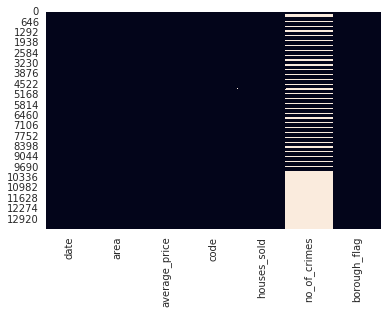

In [8]:
sns.heatmap(housing.isnull(),cbar=False)

That's a lot of null values for the two columns! Let's start dealing with them--starting with the column with the least amount of null values; houses_sold.

In [9]:
housing['houses_sold'].isnull().sum()

94

Let's replace "Unknown" in place of all the null values in houses_sold.

In [10]:
housing['houses_sold'].fillna('Unknown',inplace=True)

Checking to see how many null values remain in our houses_sold column.

In [11]:
housing['houses_sold'].isnull().sum()

0

No more null values! Now we'll take a look at the no_of_crimes column.

In [12]:
housing['no_of_crimes'].isnull().sum()

6110

Let's replace "Unknown" in place of all the null values in no_of_crimes.

In [13]:
housing['no_of_crimes'].fillna('Unknown',inplace=True)

Checking to see how many null values remain in our no_of_crimes column.

In [14]:
housing['houses_sold'].isnull().sum()

0

Perfect. No more null values

Confirming the dataframe's head and our null values visualization once more.

In [15]:
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,Unknown,1
1,1995-02-01,city of london,82203,E09000001,7.0,Unknown,1
2,1995-03-01,city of london,79121,E09000001,14.0,Unknown,1
3,1995-04-01,city of london,77101,E09000001,7.0,Unknown,1
4,1995-05-01,city of london,84409,E09000001,10.0,Unknown,1


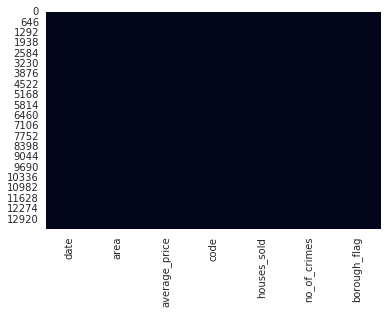

In [16]:
sns.heatmap(housing.isnull(),cbar=False)

All of our null data appears to have been resolved. To be certain, let's check the precise figures once more.

In [17]:
housing.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

No more null values exist!

But cleaning is just the beginning; before we begin analysis, we still need to make a few more adjustments to our dataset.

iv. Correcting Datatypes

The datatype for the date column is set to "Object." But a datetime object is what we want. Fix this, then.

In [18]:
housing['date'] = pd.to_datetime(housing['date'])

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13549 non-null  object        
 5   no_of_crimes   13549 non-null  object        
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 741.1+ KB


Date range for the analysis

In [20]:
# Showing min and max dates
print(housing['date'].min())
print(housing['date'].max())

1995-01-01 00:00:00
2020-01-01 00:00:00


Lets view the available areas in the dataset that aren't london boroughs

In [21]:
# Viewing the available areas in the dataset that aren't london boroughs
housing[housing['borough_flag'] == 0]['area'].unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

Viewing the london boroughs

In [22]:
housing[housing['borough_flag'] == 1]['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

# Exploratory Data Analysis

It's time to examine our data using visuals that will help us evaluate it and find the answers to our queries. Let's now attempt to respond to the initial query we made on our dataset.

# How many houses were sold in London over time?

Now let's see the number of houses sold in London over time

In [23]:

houses_sold_london = housing[housing['area'] == 'london'] \
                       .groupby('date')['houses_sold'] \
                       .sum() \
                       .reset_index() \
                       .rename(columns={'date':'Date', 'houses_sold':'Houses Sold'})
houses_sold_london.head()

,Date,Houses Sold
0,1995-01-01,7506.0
1,1995-02-01,6873.0
2,1995-03-01,9639.0
3,1995-04-01,8053.0
4,1995-05-01,9293.0


Let's plot the information above in the past two decades

In [24]:

fig = px.line(houses_sold_london[(houses_sold_london['Date'] >= '2000-01-01') & \
             (houses_sold_london['Date'] < '2019-12-01')],
              x="Date", y="Houses Sold",
              template='seaborn', title='Sold Houses in London')

fig

From this plot, the two things that most grabs our attention is the sharp decrease occured in the 2007-2008 period and the unusual surge that occured in March/2016. From our findings we can see that:

The Sharp decrease seen in the 2007-2008 period was due to the global financial crisis.

The surge in March/2016 occured because of a rush to beat an increase in the tax bill on buying a second home, that came into effect in April/2016.

In order to represent this events, we can plot them in the graph below

In [25]:

fig.add_shape( # Shape representing the decrease
    type="rect",
    xref="x",
    yref="paper",
    x0="2007-08-01",
    y0=0,
    x1="2009-02-01",
    y1=1,
    fillcolor="lightpink",
    opacity=0.5,
    layer="below",
    line_width=0,
)

fig.add_shape( # Shape representing the surge
    type="rect",
    xref="x",
    yref="paper",
    x0="2016-02-01",
    y0=0,
    x1="2016-04-01",
    y1=1,
    fillcolor="lightgreen",
    opacity=0.5,
    layer="below",
    line_width=0
)

We can also see with the plot that the average number of houses sold monthly in the first decade is higher than in the second decade. So let's confirm that.

Getting the avg for each decade and plotting in the graph

In [26]:
houses_sold_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         301 non-null    datetime64[ns]
 1   Houses Sold  301 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


In [27]:
# housing_yearly['recycling_pct'] = housing_yearly['recycling_pct'].astype(float)
houses_sold_london['Date'] = houses_sold_london['Date'].astype(str)

In [28]:
avg_first_decade = houses_sold_london[(houses_sold_london['Date'] >= '2000-01-01') & \
                                      (houses_sold_london['Date'] <= '2009-12-01')]['Houses Sold'] \
                                      .mean()

avg_first_decade = round(avg_first_decade, 0)

fig.add_shape( # add a horizontal line, representing the avg in the first decade
    type="line", line_color="coral", line_width=2, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=avg_first_decade,
    y1=avg_first_decade, yref="y"
)

fig.add_annotation( # add a text 
    text="2000s average", x='2020-01-01', y=12000 
)
avg_second_decade = houses_sold_london[(houses_sold_london['Date'] >= '2000-01-01') & \
                                      (houses_sold_london['Date'] <= '2009-12-01')]['Houses Sold'] \
                                      .mean()

avg_second_decade = round(avg_second_decade, 0)


fig.add_shape( # add a horizontal line, representing the avg in the second decade
    type="line", line_color="darkcyan", line_width=2, opacity=1, line_dash="dash",
    x0=0, x1=1, xref="paper", y0=avg_second_decade,
    y1=avg_second_decade, yref="y",  
)

fig.add_annotation( # add a text 
    text="2010s average", x='2020-01-01', y=8300 
)

From the plot above we see that the average monthly sales in the 2000s decade (~ 11950 sales/month) was 44% higher than in the second decade of the century (~ 8260 sales/month), showing that the market didn't recover to pre-crisis levels.

# How the average house price behave in the same period? How did it behave in the other regions?

First, let's create a new dataframe with the required information for the plot

In [29]:

avg_price_df = housing[housing['area'].isin(['south east', 'north east', 'north west',
                                    'yorks and the humber', 'east midlands', 
                                    'east of england', 'london', 'south west', 'west midlands'])] \
                            .filter(['date','area','average_price']) \
                            .rename(columns={'date':'Date','area':'Region','average_price':'Average Price'}) \
                            .sort_values(by='Date')

avg_price_df.head()

,Date,Region,Average Price
12045,1995-01-01,east of england,56702
12346,1995-01-01,london,74436
11443,1995-01-01,east midlands,45545
11744,1995-01-01,west midlands,48528
10841,1995-01-01,north west,43958


Let's plot the information above in the past two decades

In [31]:
px.line(avg_price_df[(avg_price_df['Date'] >= '2000-01-01') & \
       (avg_price_df['Date'] < '2019-12-01')],
        x="Date", y="Average Price", color="Region",
        template='seaborn', title='Average House Price in England by Region')

From observing the plot, we see that London had a higher average price in the past two decades, followed by the Southeast and the East of England regions. We can say that it seems that the regions had a similar trend regarding house prices in the period. The most visible exception is London, that appears to have had a higher growth rate compared to the other regions in the period from January/2013 to July/2016.

# How many houses were sold in Inner and Outer London areas? What about the average price in both regions?

Plotting sold houses and average prices between Inner and Outer London areas

In [30]:
inner_outer_df = housing[(housing['area'].isin(['inner london','outer london'])) & (housing['date'].dt.year >= 2000) & (housing['date'].dt.year <= 2019)] \
                   .groupby(['date','area'])['houses_sold','average_price'] \
                   .agg({'houses_sold':'sum','average_price':'mean'}) \
                   .reset_index() \
                   .rename(columns={'date':'Date','area':'Area','houses_sold':'Houses Sold','average_price':'Average Price'}) \
                   .melt(id_vars=['Date','Area'])

fig = px.line(inner_outer_df, x='Date', y='value', color='Area', facet_row='variable',
              title = 'Sold Houses and Average Price - Inner and Outer London')

fig.update_yaxes(matches=None) # Allows the y axes on both facets to be independent from each other

From the plot above we see that Outer London had a higher number of houses sold and a lower average price in comparison to Inner London. 

In [96]:
housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995,city of london,91449,E09000001,17.0,Unknown,1
1,1995,city of london,82203,E09000001,7.0,Unknown,1
2,1995,city of london,79121,E09000001,14.0,Unknown,1
3,1995,city of london,77101,E09000001,7.0,Unknown,1
4,1995,city of london,84409,E09000001,10.0,Unknown,1


# Clustering Using KMeans

In [23]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [64]:
housing = pd.read_csv('../BI/archive (3)/housing_in_london_monthly_variables.csv')

In [24]:
housing.to_csv(path_or_buf='housing_nn.csv')

In [25]:
housing = housing.drop(columns={'date','area','code'})
housing.head(3)

,average_price,houses_sold,no_of_crimes,borough_flag
72,284262,24.0,0.0,1
73,198137,37.0,0.0,1
74,189033,44.0,0.0,1


In [26]:
housing.dropna(subset=['average_price', 'houses_sold', 'no_of_crimes','borough_flag'], inplace=True)

In [62]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans = kmeans.fit(housing[['average_price','houses_sold']])

In [61]:
kmeans.cluster_centers_

array([[1.53646501e+05, 3.97597907e+02],
       [5.36065689e+05, 2.61460526e+02],
       [1.29490569e+06, 1.60064935e+02],
       [3.55631315e+05, 3.07426528e+02],
       [7.84512734e+05, 2.00665025e+02],
       [2.51858856e+05, 3.23984887e+02],
       [4.12520332e+05, 2.82428769e+02],
       [9.96213129e+05, 2.08817204e+02],
       [4.75833972e+05, 2.52230056e+02],
       [2.09389404e+05, 3.49661754e+02],
       [6.33517611e+05, 2.62145038e+02],
       [3.00491397e+05, 2.93491906e+02]])

In [44]:
housing['Clusters'] = kmeans.labels_

In [45]:
housing.head()

,average_price,houses_sold,no_of_crimes,borough_flag,Clusters
72,284262,24.0,0.0,1,3
73,198137,37.0,0.0,1,1
74,189033,44.0,0.0,1,1
75,205494,38.0,0.0,1,1
76,223459,30.0,0.0,1,1


In [46]:
housing['Clusters'].value_counts()

1    3008
3    2236
0    1497
4     473
2     161
Name: Clusters, dtype: int64

## Plot Cluster on chart

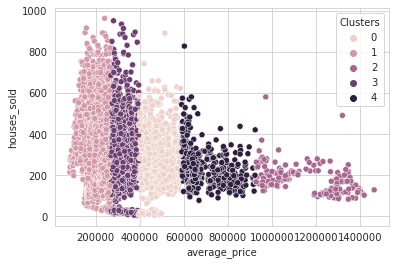

In [47]:
sns.scatterplot(x='average_price', y='houses_sold', hue='Clusters', data=housing)

In [54]:
df_Short = housing[['average_price','houses_sold']]

## Elbow method to identify clusters

In [55]:
K = range(1,12)
wss = []
for k in K:
    kmeans =  cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [56]:
# We store the number of clusters  along with their wss score in a dataframe
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

mycenters

,Clusters,WSS
0,1,2.613821e+14
1,2,1.058356e+14
2,3,4.706838e+13
3,4,2.933353e+13
4,5,1.856873e+13
5,6,1.316728e+13
6,7,9.551016e+12
7,8,7.233988e+12
8,9,5.372029e+12
9,10,4.281638e+12


## Plot Elbow Plot

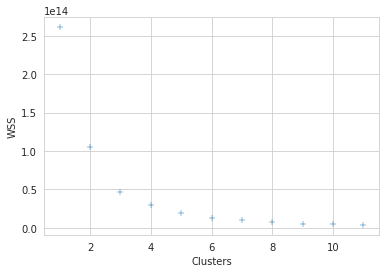

In [57]:
sns.scatterplot(x = 'Clusters', y='WSS', data=mycenters, marker='+')

# Silhouette Method to Identify Clusters

In [58]:
import sklearn.metrics as metrics

In [59]:
for i in range(3,13):
    labels = cluster.KMeans(n_clusters=i, init='k-means++', random_state=200).fit(df_Short).labels_
    print('Silhouette score for k(clusters) = ' + str(i)+ ' is '
        + str(metrics.silhouette_score(df_Short, labels, metric='euclidean', sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.6193259735335228
Silhouette score for k(clusters) = 4 is 0.6070433483508323
Silhouette score for k(clusters) = 5 is 0.5509484737785927
Silhouette score for k(clusters) = 6 is 0.5306155658164783
Silhouette score for k(clusters) = 7 is 0.5444511895727602
Silhouette score for k(clusters) = 8 is 0.54078045910682
Silhouette score for k(clusters) = 9 is 0.5514623290096377
Silhouette score for k(clusters) = 10 is 0.5590913779422667
Silhouette score for k(clusters) = 11 is 0.5285778991546615
Silhouette score for k(clusters) = 12 is 0.544030277478183
